In [16]:
import matplotlib.pyplot as plt
import numpy as np

from src.dataset import GoogleSpeechCommandsDataset

In [7]:
data_test_dir = '/home/marcel/Source/Python/DLOptimization/data/speech_commands_test_set_v0.02'
data_train_dir = '/home/marcel/Source/Python/DLOptimization/data/speech_commands_v0.02'
data_cache_dir = '/home/marcel/Source/Python/DLOptimization/cache/data/'

In [8]:
test_data = GoogleSpeechCommandsDataset(data_test_dir, data_cache_dir, encoder='mel', augment=0, train=False)
test_data.precache()
train_data = GoogleSpeechCommandsDataset(data_train_dir, data_cache_dir, encoder='mel', augment=0, train=True)
train_data.precache()

/home/marcel/Source/Python/Sketchbook/venv/lib/python3.8/site-packages/torchaudio/functional/functional.py:571: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


--- Test Dataset ---
Path:	/home/marcel/Source/Python/DLOptimization/data/speech_commands_test_set_v0.02
Cache:	/home/marcel/Source/Python/DLOptimization/cache/data/speech_commands_test_set_v0.02
Labels:	('up', 'down', 'left', 'right', 'go', 'stop', 'yes', 'no', 'on', 'off')
Length:	4074
--- Train Dataset ---
Path:	/home/marcel/Source/Python/DLOptimization/data/speech_commands_v0.02
Cache:	/home/marcel/Source/Python/DLOptimization/cache/data/speech_commands_v0.02
Labels:	('up', 'down', 'left', 'right', 'go', 'stop', 'yes', 'no', 'on', 'off')
Length:	38546


Train Data Average Count:  3854.6
Test Data Average Count:  407.4


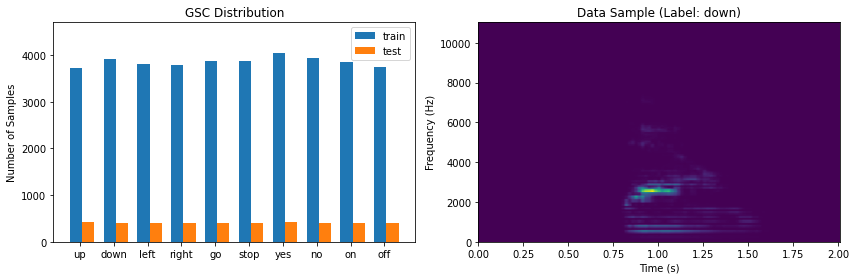

In [96]:
train_data_values = train_data.label_count.values()
train_data_keys = train_data.label_count.keys()
test_data_values = test_data.label_count.values()
test_data_keys = test_data.label_count.keys()

print('Train Data Average Count: ', sum(train_data_values)/len(train_data_keys))
print('Test Data Average Count: ', sum(test_data_values)/len(test_data_keys))

labels = train_data.labels
data = {
    'train': train_data_values,
    'test': test_data_values
}

x = np.arange(len(labels))
width = 0.36
factor = 0

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for key, value in data.items():
    offset = width * factor
    rects = ax[0].bar(x + offset+0.24, value, width, label=key)
    # ax.bar_label(rects, padding=3)
    factor += 1

encoding, label, lbl_idx, label_name, index, pitch_shift = test_data[500]
encoding = encoding.numpy()
ax[1].imshow(encoding[0,::-1], extent=[0,2.01,0,test_data.target_sample_rate//2], aspect='auto')
ax[1].set_title(f'Data Sample (Label: {label_name})')
ax[1].set_ylabel('Frequency (Hz)')
ax[1].set_xlabel('Time (s)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('Number of Samples')
ax[0].set_title('GSC Distribution')
ax[0].set_xticks(x + width)
ax[0].set_xticklabels(labels)
ax[0].legend(loc='upper right')
ax[0].set_ylim(0, 4700)

plt.tight_layout()
plt.show()